<a href="https://colab.research.google.com/github/MohHaroon/CM2604_CW/blob/main/Adult%20dataset%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Load libraries


In [1108]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Load the dataset

In [1109]:
!pip install ucimlrepo

In [1110]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
x = adult.data.features
y = adult.data.targets


# metadata
print(adult.metadata)

# variable information
print(adult.variables)


{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

In [1111]:
adult_df = pd.concat([x, y],axis=1)
adult_df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [1112]:
adult_df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [1113]:
adult_df.shape

(48842, 15)

In [1114]:
adult_df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [1115]:
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [1116]:
adult_df['income'].value_counts()

<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: income, dtype: int64

In [1117]:
adult_df['sex'].value_counts()

Male      32650
Female    16192
Name: sex, dtype: int64

In [1118]:
adult_df['age'].value_counts()

36    1348
35    1337
33    1335
23    1329
31    1325
      ... 
88       6
85       5
87       3
89       2
86       1
Name: age, Length: 74, dtype: int64

In [1119]:
adult_df['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [1120]:
adult_df['education'].value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [1121]:
adult_df['relationship'].value_counts()

Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: relationship, dtype: int64

In [1122]:
adult_df['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
?                    1843
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [1123]:
adult_df['marital-status'].value_counts()

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

In [1124]:
adult_df['native-country'].value_counts()

United-States                 43832
Mexico                          951
?                               583
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        


# Remove the decimal point from the income column

In [1125]:
adult_df['income'].replace('<=50K.', '<=50K', inplace=True)
adult_df['income'].replace('>50K.', '>50K', inplace=True)

In [1126]:
adult_df['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

#Replace "?" with NaN

In [1127]:
adult_df.replace('?', np.NaN,inplace = True)
adult_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [1128]:
adult_df.fillna(method = 'bfill', inplace = True)
# adult_df.interpolate(method='polynomial', order=5)

In [1129]:
adult_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [1130]:
adult_df['occupation'].value_counts()

Prof-specialty       6575
Craft-repair         6471
Exec-managerial      6435
Adm-clerical         5960
Sales                5840
Other-service        5215
Machine-op-inspct    3206
Transport-moving     2495
Handlers-cleaners    2203
Farming-fishing      1604
Tech-support         1527
Protective-serv      1040
Priv-house-serv       256
Armed-Forces           15
Name: occupation, dtype: int64

#Data Analysis

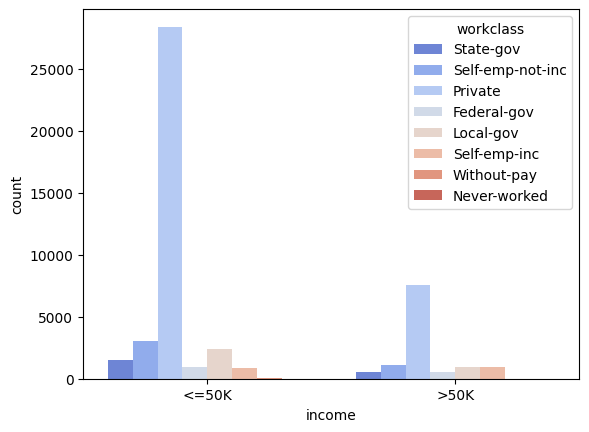

In [1131]:
sns.countplot(x='income', palette='coolwarm', hue='workclass', data=adult_df);

#Feature engineering

In [1132]:
#For the marital-status column
adult_df["marital-status"] = adult_df["marital-status"].replace(['Married-civ-spouse', 'Married-AF-spouse'], 'Married')
adult_df["marital-status"] = adult_df["marital-status"].replace(['Divorced', 'Separated', 'Widowed', 'Married-spouse-absent'], 'Other')

In [1133]:
#For the relationship column
adult_df['relationship'] = adult_df['relationship'].replace(['Husband', 'Wife'], 'Married')
adult_df['relationship'] = adult_df['relationship'].replace(['Not-in-family', 'Own-child', 'Unmarried', 'Other-relative'], 'Other relationship')

In [1134]:
adult_df["marital-status"].value_counts()

Married          22416
Never-married    16117
Other            10309
Name: marital-status, dtype: int64

In [1135]:
#For income column
adult_df["income"] = adult_df["income"].replace(['<=50K'], 0)
adult_df["income"] = adult_df["income"].replace(['>50K'], 1)

In [1136]:
adult_df["income"].value_counts()

0    37155
1    11687
Name: income, dtype: int64

#Correlation

In [1137]:
from sklearn.preprocessing import LabelEncoder

df_corr= adult_df.copy()
df_corr= df_corr.apply(LabelEncoder().fit_transform)

In [1138]:
df_corr.corr()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
age,1.000000,0.046690,-0.078902,-0.015058,0.030940,-0.078182,-0.006561,-0.321394,0.028421,0.088120,0.126027,0.062223,0.071637,-0.002462,0.230369
workclass,0.046690,1.000000,-0.030290,0.003997,0.005297,-0.052980,0.014272,-0.057597,0.052692,0.065714,0.012716,0.008621,0.035342,-0.003482,-0.001443
fnlwgt,-0.078902,-0.030290,1.000000,-0.019959,-0.037765,0.009195,-0.001300,0.028723,-0.012369,0.028302,-0.006651,-0.003616,-0.013077,-0.064038,-0.005881
education,-0.015058,0.003997,-0.019959,1.000000,0.359668,-0.007703,-0.031875,-0.010069,0.013250,-0.027041,0.032601,0.016944,0.058070,0.074472,0.080091
education-num,0.030940,0.005297,-0.037765,0.359668,1.000000,-0.085726,0.084922,-0.086951,0.029239,0.009328,0.154481,0.084184,0.144799,0.087356,0.332613
marital-status,-0.078182,-0.052980,0.009195,-0.007703,-0.085726,1.000000,-0.037242,0.874537,-0.079851,-0.444763,-0.116370,-0.065516,-0.153426,0.003340,-0.378013
occupation,-0.006561,0.014272,-0.001300,-0.031875,0.084922,-0.037242,1.000000,-0.024810,-0.001809,0.051659,0.016686,0.010318,0.016775,-0.002731,0.047272
relationship,-0.321394,-0.057597,0.028723,-0.010069,-0.086951,0.874537,-0.024810,1.000000,-0.095831,-0.435238,-0.147097,-0.081865,-0.217420,-0.000936,-0.449727
race,0.028421,0.052692,-0.012369,0.013250,0.029239,-0.079851,-0.001809,-0.095831,1.000000,0.086734,0.025255,0.019256,0.039935,0.120121,0.070934
sex,0.088120,0.065714,0.028302,-0.027041,0.009328,-0.444763,0.051659,-0.435238,0.086734,1.000000,0.076261,0.048981,0.229618,-0.002234,0.214628


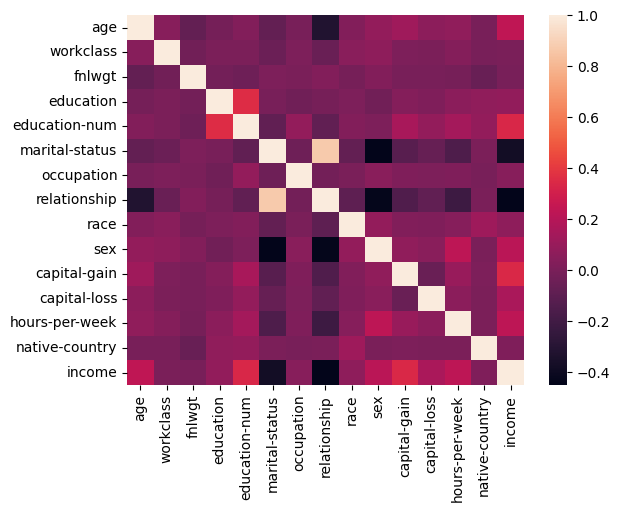

In [1139]:
sns.heatmap(df_corr.corr());

#Drop columns (workclass, fnlwgt, education, race, native-country, occupation)

In [1140]:
adult_df = adult_df.drop(['workclass', 'fnlwgt','education','race','native-country','occupation'], axis = 1)
adult_df.head(3)

,age,education-num,marital-status,relationship,sex,capital-gain,capital-loss,hours-per-week,income
0,39,13,Never-married,Other relationship,Male,2174,0,40,0
1,50,13,Married,Married,Male,0,0,13,0
2,38,9,Other,Other relationship,Male,0,0,40,0


#Histograms

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'education-num'}>],
       [<Axes: title={'center': 'capital-gain'}>,
        <Axes: title={'center': 'capital-loss'}>],
       [<Axes: title={'center': 'hours-per-week'}>,
        <Axes: title={'center': 'income'}>]], dtype=object)

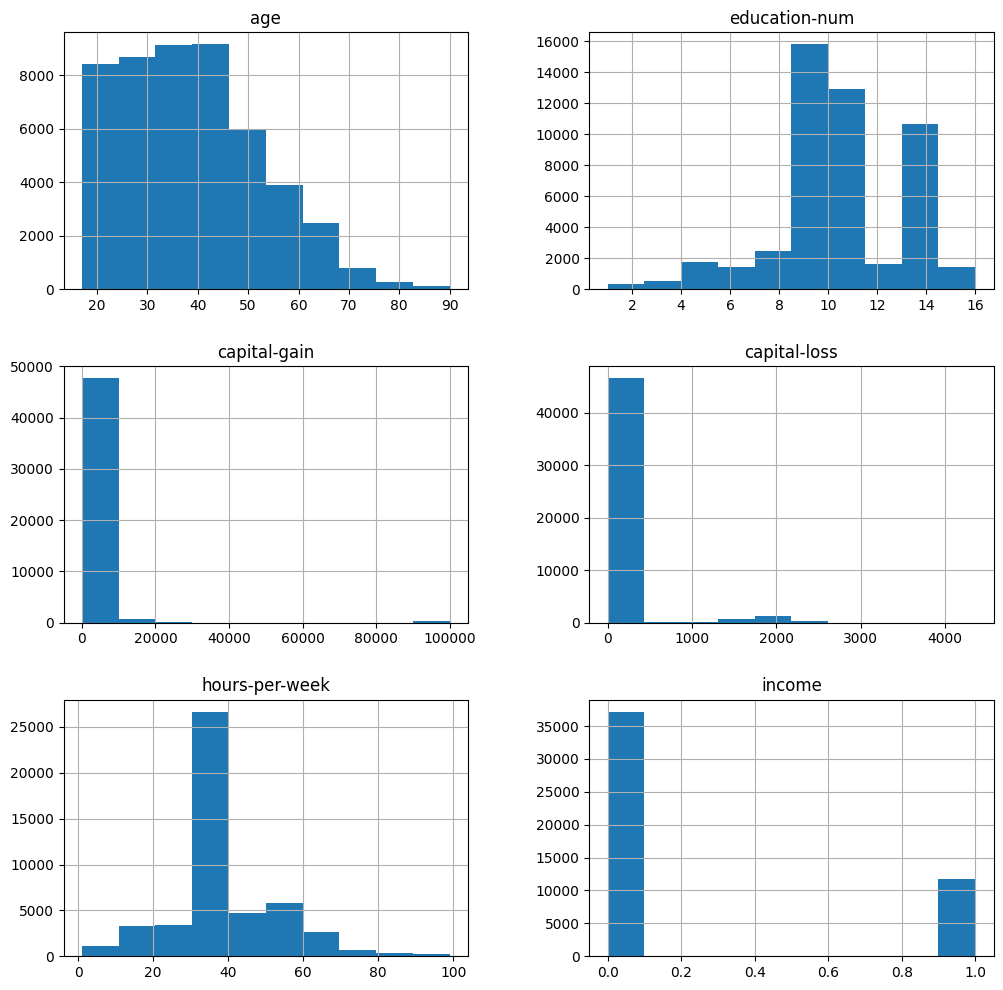

In [1141]:
adult_df.hist(figsize=(12,12))

#Build model

In [1142]:
x = adult_df.drop(['income'], axis = 1)
y = adult_df['income']

In [1143]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [1144]:
df1= adult_df.copy()
df1= df1.apply(LabelEncoder().fit_transform)
df1.head()

,age,education-num,marital-status,relationship,sex,capital-gain,capital-loss,hours-per-week,income
0,22,12,1,1,1,27,0,39,0
1,33,12,0,0,1,0,0,12,0
2,21,8,2,1,1,0,0,39,0
3,36,6,0,0,1,0,0,39,0
4,11,12,0,0,0,0,0,39,0


In [1145]:
df1.corr()

,age,education-num,marital-status,relationship,sex,capital-gain,capital-loss,hours-per-week,income
age,1.000000,0.030940,-0.078182,-0.321394,0.088120,0.126027,0.062223,0.071637,0.230369
education-num,0.030940,1.000000,-0.085726,-0.086951,0.009328,0.154481,0.084184,0.144799,0.332613
marital-status,-0.078182,-0.085726,1.000000,0.874537,-0.444763,-0.116370,-0.065516,-0.153426,-0.378013
relationship,-0.321394,-0.086951,0.874537,1.000000,-0.435238,-0.147097,-0.081865,-0.217420,-0.449727
sex,0.088120,0.009328,-0.444763,-0.435238,1.000000,0.076261,0.048981,0.229618,0.214628
capital-gain,0.126027,0.154481,-0.116370,-0.147097,0.076261,1.000000,-0.056985,0.101855,0.339128
capital-loss,0.062223,0.084184,-0.065516,-0.081865,0.048981,-0.056985,1.000000,0.058859,0.159054
hours-per-week,0.071637,0.144799,-0.153426,-0.217420,0.229618,0.101855,0.058859,1.000000,0.229022
income,0.230369,0.332613,-0.378013,-0.449727,0.214628,0.339128,0.159054,0.229022,1.000000


In [1146]:
ss= StandardScaler().fit(df1.drop('income', axis=1))

In [1147]:
X= ss.transform(df1.drop('income', axis=1))
y= adult_df['income']

Train Test Split

In [1148]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 2)
X_res, y_res = sm.fit_resample(X, y)

In [1149]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2)

#Naive Bayes

In [1150]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


In [1151]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
prediction_nb = gnb.predict(X_test)

train_gnb_accuracy = "{:.3f}".format(gnb.score(X_train, y_train))
test_gnb_accuracy = "{:.3f}".format(gnb.score(X_test, y_test))

print("Acc on training data: ", train_gnb_accuracy)
print("Acc on test data: ", test_gnb_accuracy)

Acc on training data:  0.790
Acc on test data:  0.791


In [1152]:
print(classification_report(y_test,prediction_nb))

              precision    recall  f1-score   support

           0       0.79      0.80      0.79      7479
           1       0.79      0.78      0.79      7383

    accuracy                           0.79     14862
   macro avg       0.79      0.79      0.79     14862
weighted avg       0.79      0.79      0.79     14862



In [1153]:
print(confusion_matrix(y_test,prediction_nb))

[[5961 1518]
 [1595 5788]]


In [1154]:
print(accuracy_score(y_test,prediction_nb)*100)

79.0539631274391


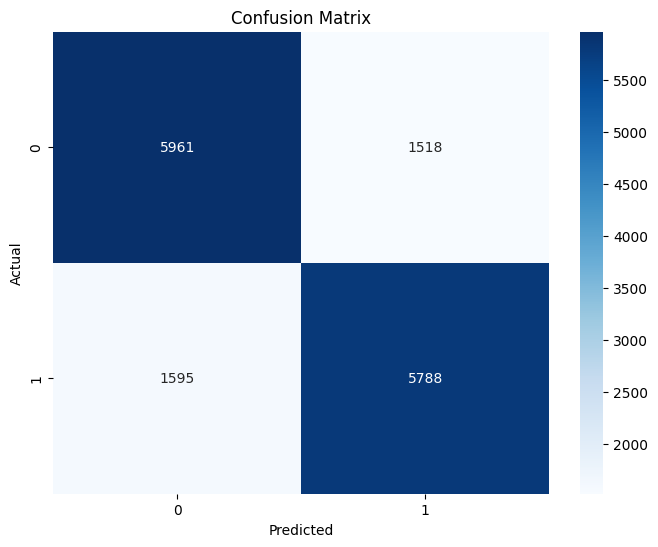

In [1155]:
cm = confusion_matrix(y_test, prediction_nb)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=gnb.classes_, yticklabels=gnb.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [1156]:
bnb = BernoulliNB()
bnb.fit(X_train,y_train)
prediction_nbb = bnb.predict(X_test)

print("Acc on training data: {:,.3f}".format(bnb.score(X_train, y_train)))
print("Acc on test data: {:,.3f}".format(bnb.score(X_test, y_test)))

Acc on training data: 0.765
Acc on test data: 0.768


In [1157]:
print(classification_report(y_test,prediction_nbb))

              precision    recall  f1-score   support

           0       0.83      0.68      0.75      7479
           1       0.73      0.85      0.79      7383

    accuracy                           0.77     14862
   macro avg       0.78      0.77      0.77     14862
weighted avg       0.78      0.77      0.77     14862



In [1158]:
print(confusion_matrix(y_test,prediction_nbb))

[[5108 2371]
 [1076 6307]]


In [1159]:
print(accuracy_score(y_test,prediction_nbb)*100)

76.80662091239402


#Random Forest Classification

In [1160]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


rfc = RandomForestClassifier()

rfc_model = rfc.fit(X_train, y_train)
predictionRF = rfc_model.predict(X_test)

train_rfc_accuracy = "{:.3f}".format(rfc.score(X_train, y_train))
test_rfc_accuracy = "{:.3f}".format(rfc.score(X_test, y_test))

print("Acc on training data: ", train_rfc_accuracy)
print("Acc on test data: ", test_rfc_accuracy)

Acc on training data:  0.923
Acc on test data:  0.868


In [1161]:
print(confusion_matrix(y_test, predictionRF))

[[6312 1167]
 [ 799 6584]]


In [1162]:
print(classification_report(y_test, predictionRF))

              precision    recall  f1-score   support

           0       0.89      0.84      0.87      7479
           1       0.85      0.89      0.87      7383

    accuracy                           0.87     14862
   macro avg       0.87      0.87      0.87     14862
weighted avg       0.87      0.87      0.87     14862



In [1163]:
print(accuracy_score(y_test,predictionRF)*100)

86.77163235096218


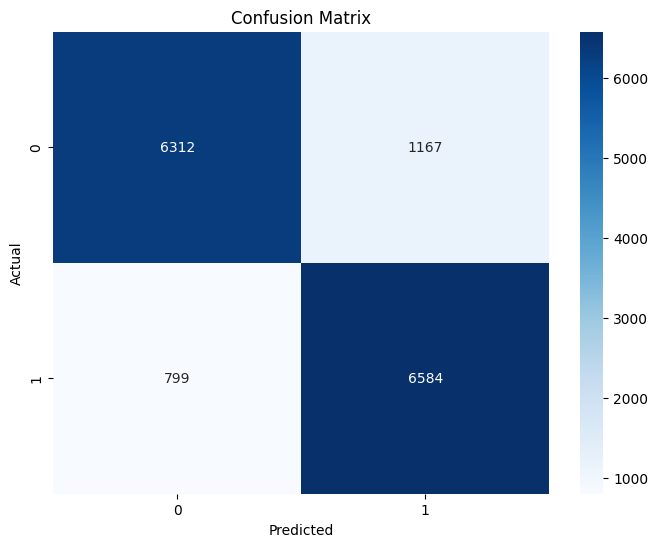

In [1164]:
cm = confusion_matrix(y_test, predictionRF)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=gnb.classes_, yticklabels=gnb.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#Model Evaluation

In [1165]:
from prettytable import PrettyTable

model_eval_table = PrettyTable()
model_eval_table.field_names = ['Model', 'Training Accuracy', 'Test Accuracy']
model_eval_table.add_row(["Random Forest Classifier", train_rfc_accuracy, test_rfc_accuracy])
model_eval_table.add_row(["Gaussian Naive Bayes", train_gnb_accuracy, test_gnb_accuracy])

print(model_eval_table)

+--------------------------+-------------------+---------------+
|          Model           | Training Accuracy | Test Accuracy |
+--------------------------+-------------------+---------------+
| Random Forest Classifier |       0.923       |     0.868     |
|   Gaussian Naive Bayes   |       0.790       |     0.791     |
+--------------------------+-------------------+---------------+
